# Task 2

In [79]:
from json import dump, load
import numpy as np
import pandas as pd
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge

X = read_csv('features-bulk.csv')
y = read_csv('target-bulk.csv')
y = y.astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)
y_test = y_test.astype(float)  # or int, depending on your data


'''def calculate_r2(y_true, pred_y, target_column_name):
    # Extract the target column
    y_true_numeric = pd.to_numeric(y_true[target_column_name], errors='coerce')

    # Calculate the R-squared score
    mean_y_true = y_true_numeric.mean()
    total_sum_of_squares = ((y_true_numeric - mean_y_true) ** 2).sum()

    # Check if total_sum_of_squares is zero
    if total_sum_of_squares == 0:
        r2 = 0  # or set to another appropriate value
    else:
        residual_sum_of_squares = ((y_true_numeric - pred_y) ** 2).sum()
        r2 = 1 - (residual_sum_of_squares / total_sum_of_squares)

    return r2'''




'''def calculate_r2(y_true, pred_y):
    
    #Calculate the R-squared score.
    mean_y_true = sum(y_true) / len(y_true)
    total_sum_of_squares = 0
    for y_i in y_true:
       total_sum_of_squares += ((y_i - mean_y_true) ** 2)
    # Check if total_sum_of_squares is zero
    if total_sum_of_squares == 0:
        r2 = 0  # or set to another appropriate value
    else:
        residual_sum_of_squares = 0
        for y_j, y_pred_j in zip(y_true, pred_y):
            residual_sum_of_squares +=((y_j - y_pred_j) ** 2 )
            r2 = 1 - (residual_sum_of_squares / total_sum_of_squares)
    return r2'''


def calculate_r2(y_true, y_pred):
    # Calculate the R-squared score
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ss_res / ss_tot) if ss_tot != 0 else 0
    return r2



# Linear Least Square Model:

In [80]:
def Lin_reg(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    pred_y = model.predict(X_test)
    y_true = y_test['K_VRH']
    linear_r2 = calculate_r2(y_true, pred_y)
    return linear_r2

Lin_reg_Std = Lin_reg(X_train_standardized, X_test_standardized, y_train, y_test)
Lin_reg_NonStd = Lin_reg(X_train, X_test, y_train, y_test)
print("Linear Regression R-squared for Standardized data:",Lin_reg_Std)
print("Linear Regression R-squared for Non-standardized data:",Lin_reg_NonStd)

Linear Regression R-squared for Standardized data: 0.8999042909624274
Linear Regression R-squared for Non-standardized data: 0.9059021496551956


### Lasso Regression:

In [81]:
def Lasso_reg(X_train, X_test, y_train, y_test):
    lasso_params = {'alpha': [0.01, 0.1, 1, 10]}
    lasso_grid = GridSearchCV(Lasso(max_iter=10000), lasso_params, cv=5)
    lasso_grid.fit(X_train, y_train)
    y_true = y_test['K_VRH']
    lasso_y_pred = lasso_grid.predict(X_test)
    lasso_r2 = calculate_r2(y_true, lasso_y_pred)
    #print("Lasso Regression R-squared:", lasso_r2)
    lasso_selector = SelectFromModel(lasso_grid.best_estimator_, max_features=10)
    lasso_selector.fit(X_train, y_train)
    lasso_important_features = X.columns[lasso_selector.get_support()]
    return lasso_r2, lasso_important_features

Lasso_reg_Std = Lasso_reg(X_train_standardized, X_test_standardized, y_train, y_test)
print("Lasso Regression R-squared for Standardized data:",Lasso_reg_Std[0])
print("Important features for Standardized data using Lasso Regression:",Lasso_reg_Std[1])
Lasso_reg_NonStd = Lasso_reg(X_train, X_test, y_train, y_test)
print("Lasso Regression R-squared for Non Standardized data:",Lasso_reg_NonStd[0])
print("Important features for Non Standardized data using Lasso Regression:",Lasso_reg_NonStd[1])


c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.343e+04, tolerance: 4.255e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.868e+04, tolerance: 3.995e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

Lasso Regression R-squared for Standardized data: 0.9057263586351699
Important features for Standardized data using Lasso Regression: Index(['MagpieData mean Number', 'MagpieData mean MeltingT',
       'MagpieData mean CovalentRadius', 'MagpieData mean NfValence',
       'MagpieData mean NValence', 'MagpieData minimum GSvolume_pa',
       'MagpieData mean GSvolume_pa', 'MagpieData mean GSmagmom', 'density',
       'packing fraction'],
      dtype='object')


c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.392e+05, tolerance: 4.255e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.367e+05, tolerance: 3.995e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

Lasso Regression R-squared for Non Standardized data: 0.9017144010524595
Important features for Non Standardized data using Lasso Regression: Index(['MagpieData minimum Row', 'MagpieData mean Row',
       'MagpieData minimum NpValence', 'MagpieData mean NpValence',
       'MagpieData avg_dev GSbandgap', 'MagpieData minimum GSmagmom',
       'MagpieData mean GSmagmom', 'MagpieData avg_dev GSmagmom', 'density',
       'packing fraction'],
      dtype='object')


c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.756e+05, tolerance: 5.008e+02
  model = cd_fast.enet_coordinate_descent(


### Polynomial Lasso Regression with Standardized data:

In [82]:
def Lasso_Poly_Reg(X_train, X_test, y_train, y_test):
    # Apply polynomial transformation to the Non nstandardized features
    poly_order = 2
    lasso_params = {'alpha': [0.01, 0.1, 1, 10]}
    poly = PolynomialFeatures(degree=poly_order)
    X_poly_train = poly.fit_transform(X_train)
    # Fit Lasso regression on the polynomial features
    poly_lasso_grid = GridSearchCV(Lasso(max_iter=10000), lasso_params, cv=5)
    poly_lasso_grid.fit(X_poly_train, y_train)

    # Perform feature selection on the polynomial features
    Poly_lasso_selector = SelectFromModel(poly_lasso_grid.best_estimator_, max_features=10)
    Poly_lasso_selector.fit(X_poly_train, y_train)
    
    '''poly_lasso_selected_features_mask = Poly_lasso_selector.get_support()
    poly_lasso_selected_features = X_poly_train[:, poly_lasso_selected_features_mask]'''
    poly_lasso_selected_features_indices = Poly_lasso_selector.get_support(indices=True)
    poly_lasso_feature_names = poly.get_feature_names_out(X.columns)
    poly_lasso_selected_features_indices_str = [str(i) for i in poly_lasso_selected_features_indices]
    # Map the selected feature indices back to the original feature names
    poly_lasso_selected_features_indices_original= []
    poly_lasso_selected_features_indices_original = [int(x) for x in poly_lasso_selected_features_indices_str if int(x) < len(poly_lasso_feature_names)]
    # Extract the feature names
    poly_lasso_important_features = np.array(poly_lasso_feature_names[poly_lasso_selected_features_indices_original]).flatten()
    X_poly_test = poly.transform(X_test)
    y_pred = poly_lasso_grid.predict(X_poly_test)
    poly_lasso_r2 = calculate_r2(y_test, y_pred)
    print("poly_lasso_r2",poly_lasso_r2)
    return poly_lasso_r2, poly_lasso_important_features

Lasso_Reg_Poly_Std = Lasso_Poly_Reg(X_train_standardized, X_test_standardized, y_train, y_test)
print("Polynomial Lasso Regression R-squared for Standardized data:",Lasso_Reg_Poly_Std[0])
print("lasso_poly_important_features for standardized data",Lasso_Reg_Poly_Std[1])
Lasso_Reg_Poly_NonStd = Lasso_Poly_Reg(X_train, X_test, y_train, y_test)
print("Polynomial Lasso Regression R-squared for Non-Standardized data:",Lasso_Reg_Poly_NonStd[0])
print("lasso_poly_important_features for non standardized data",Lasso_Reg_Poly_NonStd[1])



c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.426e+03, tolerance: 4.255e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.689e+03, tolerance: 3.995e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

poly_lasso_r2 0.9342745594579133
Polynomial Lasso Regression R-squared for Standardized data: 0.9342745594579133
lasso_poly_important_features for standardized data ['MagpieData mean MeltingT' 'MagpieData minimum GSvolume_pa' 'density'
 'vpa' 'MagpieData mean MeltingT vpa'
 'MagpieData mean Electronegativity vpa'
 'MagpieData mode NdUnfilled packing fraction'
 'MagpieData minimum GSbandgap vpa'
 'MagpieData minimum GSbandgap packing fraction' 'vpa^2']


c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.041e+03, tolerance: 4.255e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.662e+03, tolerance: 3.995e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

poly_lasso_r2 0.8914407982416213
Polynomial Lasso Regression R-squared for Non-Standardized data: 0.8914407982416213
lasso_poly_important_features for non standardized data ['MagpieData minimum MendeleevNumber density'
 'MagpieData minimum MendeleevNumber vpa'
 'MagpieData mode MendeleevNumber density'
 'MagpieData minimum CovalentRadius vpa'
 'MagpieData maximum CovalentRadius MagpieData mode NUnfilled'
 'MagpieData maximum NsUnfilled MagpieData minimum SpaceGroupNumber'
 'MagpieData maximum NpUnfilled MagpieData range SpaceGroupNumber'
 'MagpieData mode NUnfilled MagpieData mode SpaceGroupNumber'
 'MagpieData maximum GSmagmom MagpieData minimum SpaceGroupNumber'
 'MagpieData range SpaceGroupNumber vpa']


c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.562e+04, tolerance: 5.008e+02
  model = cd_fast.enet_coordinate_descent(


### Ridge Regression:

In [83]:
def Ridge_reg(X_train, X_test, y_train, y_test):
    ridge_params = {'alpha': [0.01, 0.1, 1, 10]}
    ridge_grid = GridSearchCV(Lasso(max_iter=10000), ridge_params, cv=5)
    ridge_grid.fit(X_train, y_train)
    y_true = y_test['K_VRH']
    ridge_y_pred = ridge_grid.predict(X_test)
    ridge_r2 = calculate_r2(y_true, ridge_y_pred)
    #print("Ridge Regression R-squared:", ridge_r2)
    ridge_selector = SelectFromModel(ridge_grid.best_estimator_, max_features=10)
    ridge_selector.fit(X_train, y_train)
    ridge_important_features = X.columns[ridge_selector.get_support()]
    return ridge_r2, ridge_important_features
Ridge_reg_Std = Ridge_reg(X_train_standardized, X_test_standardized, y_train, y_test)
print("Ridge Regression R-squared for Standardized data:",Ridge_reg_Std[0])
print("Important features based on ridge rig with standardized data: ", Ridge_reg_Std[1])
Ridge_reg_NonStd = Ridge_reg(X_train, X_test, y_train, y_test)
print("Ridge Regression R-squared for Non-Standardized data:",Ridge_reg_NonStd[0])
print("Important features based on ridge rig with non-standardized data: ", Ridge_reg_NonStd[1])



c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.343e+04, tolerance: 4.255e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.868e+04, tolerance: 3.995e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

Ridge Regression R-squared for Standardized data: 0.9057263586351699
Important features based on ridge rig with standardized data:  Index(['MagpieData mean Number', 'MagpieData mean MeltingT',
       'MagpieData mean CovalentRadius', 'MagpieData mean NfValence',
       'MagpieData mean NValence', 'MagpieData minimum GSvolume_pa',
       'MagpieData mean GSvolume_pa', 'MagpieData mean GSmagmom', 'density',
       'packing fraction'],
      dtype='object')


c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.392e+05, tolerance: 4.255e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.367e+05, tolerance: 3.995e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

Ridge Regression R-squared for Non-Standardized data: 0.9017144010524595
Important features based on ridge rig with non-standardized data:  Index(['MagpieData minimum Row', 'MagpieData mean Row',
       'MagpieData minimum NpValence', 'MagpieData mean NpValence',
       'MagpieData avg_dev GSbandgap', 'MagpieData minimum GSmagmom',
       'MagpieData mean GSmagmom', 'MagpieData avg_dev GSmagmom', 'density',
       'packing fraction'],
      dtype='object')


c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.756e+05, tolerance: 5.008e+02
  model = cd_fast.enet_coordinate_descent(


### Polynomial Ridge Regression:

In [89]:
def Ridge_Poly_Reg(X_train, X_test, y_train, y_test):
    # Apply polynomial transformation to the features
    poly_order = 2
    ridge_params = {'alpha': [0.01, 0.1, 1, 10]}
    poly = PolynomialFeatures(degree=poly_order)
    X_poly_train = poly.fit_transform(X_train)
    
    # Fit Ridge regression on the polynomial features
    poly_ridge_grid = GridSearchCV(Ridge(max_iter=10000), ridge_params, cv=5)
    poly_ridge_grid.fit(X_poly_train, y_train)
    
    # Perform feature selection on the polynomial features
    poly_ridge_selector = SelectFromModel(poly_ridge_grid.best_estimator_, max_features=10)
    poly_ridge_selector.fit(X_poly_train, y_train)
    
    # Get the indices of the selected features
    poly_ridge_selected_features_indices = poly_ridge_selector.get_support(indices=True)
    ridge_poly_feature_names = poly.get_feature_names_out(X.columns)
    
    # Extract the selected feature names
    ridge_poly_selected_features_indices_original = [
        int(x) for x in poly_ridge_selected_features_indices if int(x) < len(ridge_poly_feature_names)
    ]
    ridge_poly_important_features = np.array(ridge_poly_feature_names[ridge_poly_selected_features_indices_original]).flatten()
    
    # Transform the test data
    X_poly_test = poly.transform(X_test)
    y_pred = poly_ridge_grid.predict(X_poly_test)
    
    # Calculate R-squared
    poly_ridge_r2 = calculate_r2(y_test, y_pred)
    print("poly_ridge_r2", poly_ridge_r2)
    
    return poly_ridge_r2, ridge_poly_important_features

Ridge_Reg_Poly_Std = Ridge_Poly_Reg(X_train_standardized, X_test_standardized, y_train, y_test)
print("poly ridge reg R-squared for standardised data: ", Ridge_Reg_Poly_Std[0])
Ridge_Reg_Poly_Std[0]
print("important_features for poly ridge reg standardized data: ",Ridge_Reg_Poly_Std[1])

Ridge_Reg_Poly_NonStd = Ridge_Poly_Reg(X_train, X_test, y_train, y_test)
print("poly ridge reg with R-squared for Non-standardised data: ", Ridge_Reg_Poly_NonStd[0])
print("important_features for poly ridge reg Non-standardized data: ",Ridge_Reg_Poly_NonStd[1])



poly_ridge_r2 0.7353294803752257
poly ridge reg R-squared for standardised data:  0.7353294803752257
important_features for poly ridge reg standardized data:  ['MagpieData maximum MeltingT' 'MagpieData mean MeltingT'
 'MagpieData mode MeltingT' 'density' 'vpa' 'packing fraction'
 'MagpieData minimum GSbandgap density' 'MagpieData minimum GSbandgap vpa'
 'MagpieData minimum GSbandgap packing fraction'
 'MagpieData mean GSbandgap vpa']


c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=2.53744e-20): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\l

poly_ridge_r2 -7.683161190256824
poly ridge reg with R-squared for Non-standardised data:  -7.683161190256824
important_features for poly ridge reg Non-standardized data:  ['space_group MagpieData mean Number'
 'space_group MagpieData avg_dev Column'
 'space_group MagpieData mode NpValence'
 'space_group MagpieData avg_dev NpUnfilled'
 'space_group MagpieData mode GSbandgap'
 'space_group MagpieData minimum GSmagmom' 'space_group density'
 'MagpieData mode MendeleevNumber vpa'
 'MagpieData mean AtomicWeight density' 'MagpieData mean AtomicWeight vpa']


### Tree Regressors:

In [90]:
def tree(X_train, X_test, y_train, y_test):
    tree_reg = DecisionTreeRegressor(random_state=42)

    # Find optimal tree depth using GridSearchCV
    param_grid = {'max_depth': np.arange(1, 21)}
    grid_search_tree = GridSearchCV(tree_reg, param_grid, cv=5, scoring='r2')
    grid_search_tree.fit(X_train, y_train)
    optimal_tree_depth = grid_search_tree.best_params_['max_depth']

    # Train the Decision Tree Regressor with the optimal depth
    final_tree_reg = DecisionTreeRegressor(max_depth=optimal_tree_depth, random_state=42)
    final_tree_reg.fit(X_train, y_train)
    y_true = y_test['K_VRH']
    tree_y_pred = final_tree_reg.predict(X_test)
    Tree_r2 = calculate_r2(y_true, tree_y_pred)

    # Store the ten most important features for both models
    tree_importances = final_tree_reg.feature_importances_

    top_10_tree_features = np.argsort(tree_importances)[-10:][::-1]
    Decision_tree_imp_features = X.columns[top_10_tree_features]

    return Tree_r2, Decision_tree_imp_features

Decision_tree_Reg_Std = tree(X_train_standardized, X_test_standardized, y_train, y_test)
print("Decision tree Regression R-squared for Standardized data:",Decision_tree_Reg_Std[0])
print("Important features based on Decision tree regression with standardized data: ", Decision_tree_Reg_Std[1])

Decision_tree_Reg_NonStd = tree(X_train, X_test, y_train, y_test)
print("Decision tree Regression R-squared for Non-Standardized data:",Decision_tree_Reg_NonStd[0])
print("Important features based on Decision tree regression with Non-standardized data: ", Decision_tree_Reg_NonStd[1])

def GradientBoost(X_train, X_test, y_train, y_test):

    # Task 2.4.2: Train Gradient Boosted Decision Tree
    gradient_boost_reg = GradientBoostingRegressor(random_state=42)

    # Find optimal parameters using GridSearchCV
    param_grid_gb = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2]}
    grid_search_gb = GridSearchCV(gradient_boost_reg, param_grid_gb, cv=5, scoring='r2')
    grid_search_gb.fit(X_train, y_train)

    optimal_n_estimators = grid_search_gb.best_params_['n_estimators']
    optimal_learning_rate = grid_search_gb.best_params_['learning_rate']

    # Train the Gradient Boosted Decision Tree with optimal parameters
    final_gb_reg = GradientBoostingRegressor(n_estimators=optimal_n_estimators, learning_rate=optimal_learning_rate, random_state=42)
    final_gb_reg.fit(X_train, y_train)
    y_true = y_test['K_VRH']
    tree_gradBoost_y_pred = final_gb_reg.predict(X_test)
    Tree_gradBoost_r2 = calculate_r2(y_true, tree_gradBoost_y_pred)

    # Store the ten most important features for both models
    gb_importances = final_gb_reg.feature_importances_

    top_10_gb_features = np.argsort(gb_importances)[-10:][::-1]
    Grad_boost_imp_features = X.columns[top_10_gb_features]

    return Tree_gradBoost_r2, Grad_boost_imp_features

Decision_tree_Reg_gradBoost_Std = GradientBoost(X_train_standardized, X_test_standardized, y_train, y_test)
print("Decision tree Regression R-squared for Standardized data:",Decision_tree_Reg_gradBoost_Std[0])
print("Important features based on Decision tree regression with standardized data: ", Decision_tree_Reg_gradBoost_Std[1])

Decision_tree_Reg_gradBoost_NonStd = GradientBoost(X_train, X_test, y_train, y_test)
print("Decision tree Regression R-squared for Non-Standardized data:",Decision_tree_Reg_gradBoost_NonStd[0])
print("Important features based on Decision tree regression with Non-standardized data: ", Decision_tree_Reg_gradBoost_NonStd[1])

Decision tree Regression R-squared for Standardized data: 0.8568576020679228
Important features based on Decision tree regression with standardized data:  Index(['MagpieData mean MeltingT', 'vpa', 'MagpieData minimum MeltingT',
       'MagpieData maximum GSvolume_pa', 'MagpieData maximum MeltingT',
       'MagpieData mode NValence', 'packing fraction',
       'MagpieData mean Electronegativity', 'MagpieData mode GSvolume_pa',
       'MagpieData minimum MendeleevNumber'],
      dtype='object')
Decision tree Regression R-squared for Non-Standardized data: 0.8561955677262136
Important features based on Decision tree regression with Non-standardized data:  Index(['MagpieData mean MeltingT', 'vpa', 'MagpieData minimum MeltingT',
       'MagpieData maximum GSvolume_pa', 'MagpieData maximum MeltingT',
       'MagpieData mode NValence', 'packing fraction',
       'MagpieData mean Electronegativity', 'MagpieData mode GSvolume_pa',
       'MagpieData minimum MendeleevNumber'],
      dtype='objec

c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A 

Decision tree Regression R-squared for Standardized data: 0.9338597355187669
Important features based on Decision tree regression with standardized data:  Index(['MagpieData mean MeltingT', 'vpa', 'density',
       'MagpieData minimum MeltingT', 'MagpieData maximum MeltingT',
       'MagpieData minimum Column', 'MagpieData mode Column',
       'MagpieData mode GSvolume_pa', 'MagpieData maximum GSvolume_pa',
       'MagpieData mean GSvolume_pa'],
      dtype='object')


c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A 

Decision tree Regression R-squared for Non-Standardized data: 0.9339067500303867
Important features based on Decision tree regression with Non-standardized data:  Index(['MagpieData mean MeltingT', 'vpa', 'density',
       'MagpieData minimum MeltingT', 'MagpieData maximum MeltingT',
       'MagpieData minimum Column', 'MagpieData mode Column',
       'MagpieData mode GSvolume_pa', 'MagpieData maximum GSvolume_pa',
       'MagpieData mean GSvolume_pa'],
      dtype='object')


# Kernel Ridge Regressor:

In [92]:
def kernel_ridge(X_train, X_test, y_train, y_test):
    kernel_ridge = KernelRidge()
    param_grid_kernel = {'alpha': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': [0.1, 1, 10]}
    # GridSearchCV to find optimal parameters
    kernel = GridSearchCV(kernel_ridge, param_grid_kernel, cv=5)
    kernel.fit(X_train, y_train)
    y_true = y_test['K_VRH']
    pred_y = kernel.predict(X_test)  # Use X_test here instead of X_train_standardized
    kernel_r2 = calculate_r2(y_true, pred_y)
    # Get the optimal hyperparameters
    optimal_alpha = kernel.best_params_['alpha']
    optimal_kernel = kernel.best_params_['kernel']
    optimal_gamma = kernel.best_params_['gamma']
    return kernel_r2, optimal_alpha, optimal_kernel, optimal_gamma

Kernel_ridge_Reg_Std_r2, Kernel_ridge_Std_optimal_reg, Kernel_ridge_Std_optiomal_kernel, Kernel_ridge_Std_optimal_gamma = kernel_ridge(X_train_standardized, X_test_standardized, y_train, y_test)
print(f"Kernel Ridge Regression R-squared for Standardized  data: {Kernel_ridge_Reg_Std_r2}, optimal regularization parameter = {Kernel_ridge_Std_optimal_reg}, optimal kernel is {Kernel_ridge_Std_optiomal_kernel}, optimal gamma = {Kernel_ridge_Std_optimal_gamma}")
Kernel_ridge_Reg_NonStd_r2, Kernel_ridge_NonStd_optimal_reg, Kernel_ridge_NonStd_optiomal_kernel, Kernel_ridge_NonStd_optimal_gamma = kernel_ridge(X_train, X_test, y_train, y_test)
print(f"Kernel Ridge Regression R-squared for Non-Standardized data: {Kernel_ridge_Reg_NonStd_r2}, optimal regularization parameter = {Kernel_ridge_NonStd_optimal_reg}, optimal kernel is {Kernel_ridge_NonStd_optiomal_kernel}, optimal gamma = {Kernel_ridge_NonStd_optimal_gamma}")

Kernel Ridge Regression R-squared for Standardized  data: 0.8832384135125756, optimal regularization parameter = 10, optimal kernel is poly, optimal gamma = 0.1


c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=1.07421e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=1.20696e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=5.16642e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
c:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=1.00926e-17): result may not be accurate.
  dual_coef 

Kernel Ridge Regression R-squared for Non-Standardized data: 0.9022813295108342, optimal regularization parameter = 1, optimal kernel is linear, optimal gamma = 0.1


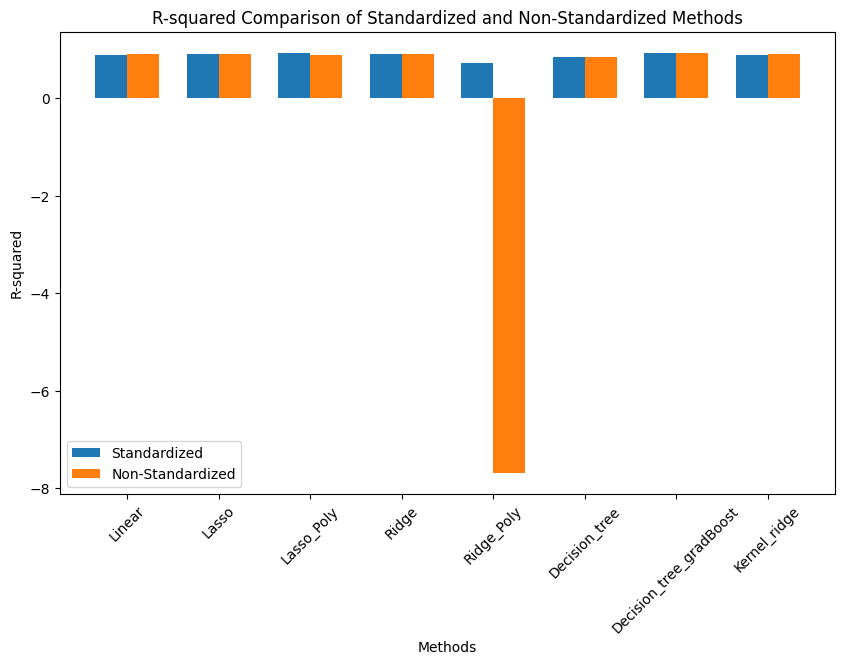

In [105]:
# Assuming r2_values dictionary is already defined
All_r2_values = {
    'Linear_Std': Lin_reg_Std,
    'Linear_NonStd': Lin_reg_NonStd,
    'Lasso_Std': Lasso_reg_Std[0],
    'Lasso_NonStd': Lasso_reg_NonStd[0],
    'Lasso_Poly_Std': Lasso_Reg_Poly_Std[0],
    'Lasso_Poly_NonStd': Lasso_Reg_Poly_NonStd[0],
    'Ridge_Std': Ridge_reg_Std[0],
    'Ridge_NonStd': Ridge_reg_NonStd[0],
    'Ridge_Poly_Std': Ridge_Reg_Poly_Std[0],
    'Ridge_Poly_NonStd': Ridge_Reg_Poly_NonStd[0],
    'Decision_tree_Std': Decision_tree_Reg_Std[0],
    'Decision_tree_NonStd': Decision_tree_Reg_NonStd[0],
    'Decision_tree_gradBoost_Std': Decision_tree_Reg_gradBoost_Std[0],
    'Decision_tree_gradBoost_NonStd': Decision_tree_Reg_gradBoost_NonStd[0],
    'Kernel_ridge_Std': Kernel_ridge_Reg_Std_r2,
    'Kernel_ridge_NonStd': Kernel_ridge_Reg_NonStd_r2    
}

# R-squared values grouped bar plot
def plot_r2_comparison(All_r2_values):
    methods = ['Linear', 'Lasso', 'Lasso_Poly', 'Ridge', 'Ridge_Poly', 'Decision_tree', 'Decision_tree_gradBoost', 'Kernel_ridge']
    std_r2 = [All_r2_values[f'{method}_Std'] for method in methods]
    nonstd_r2 = [All_r2_values[f'{method}_NonStd'] for method in methods]

    x = np.arange(len(methods))
    bar_width = 0.35

    plt.figure(figsize=(10, 6))
    plt.bar(x - bar_width/2, std_r2, bar_width, label='Standardized')
    plt.bar(x + bar_width/2, nonstd_r2, bar_width, label='Non-Standardized')

    plt.xlabel('Methods')
    plt.ylabel('R-squared')
    plt.title('R-squared Comparison of Standardized and Non-Standardized Methods')
    plt.xticks(x, methods, rotation=45)
    plt.legend()
    plt.show()

# Plotting the R-squared comparison
plot_r2_comparison(All_r2_values)

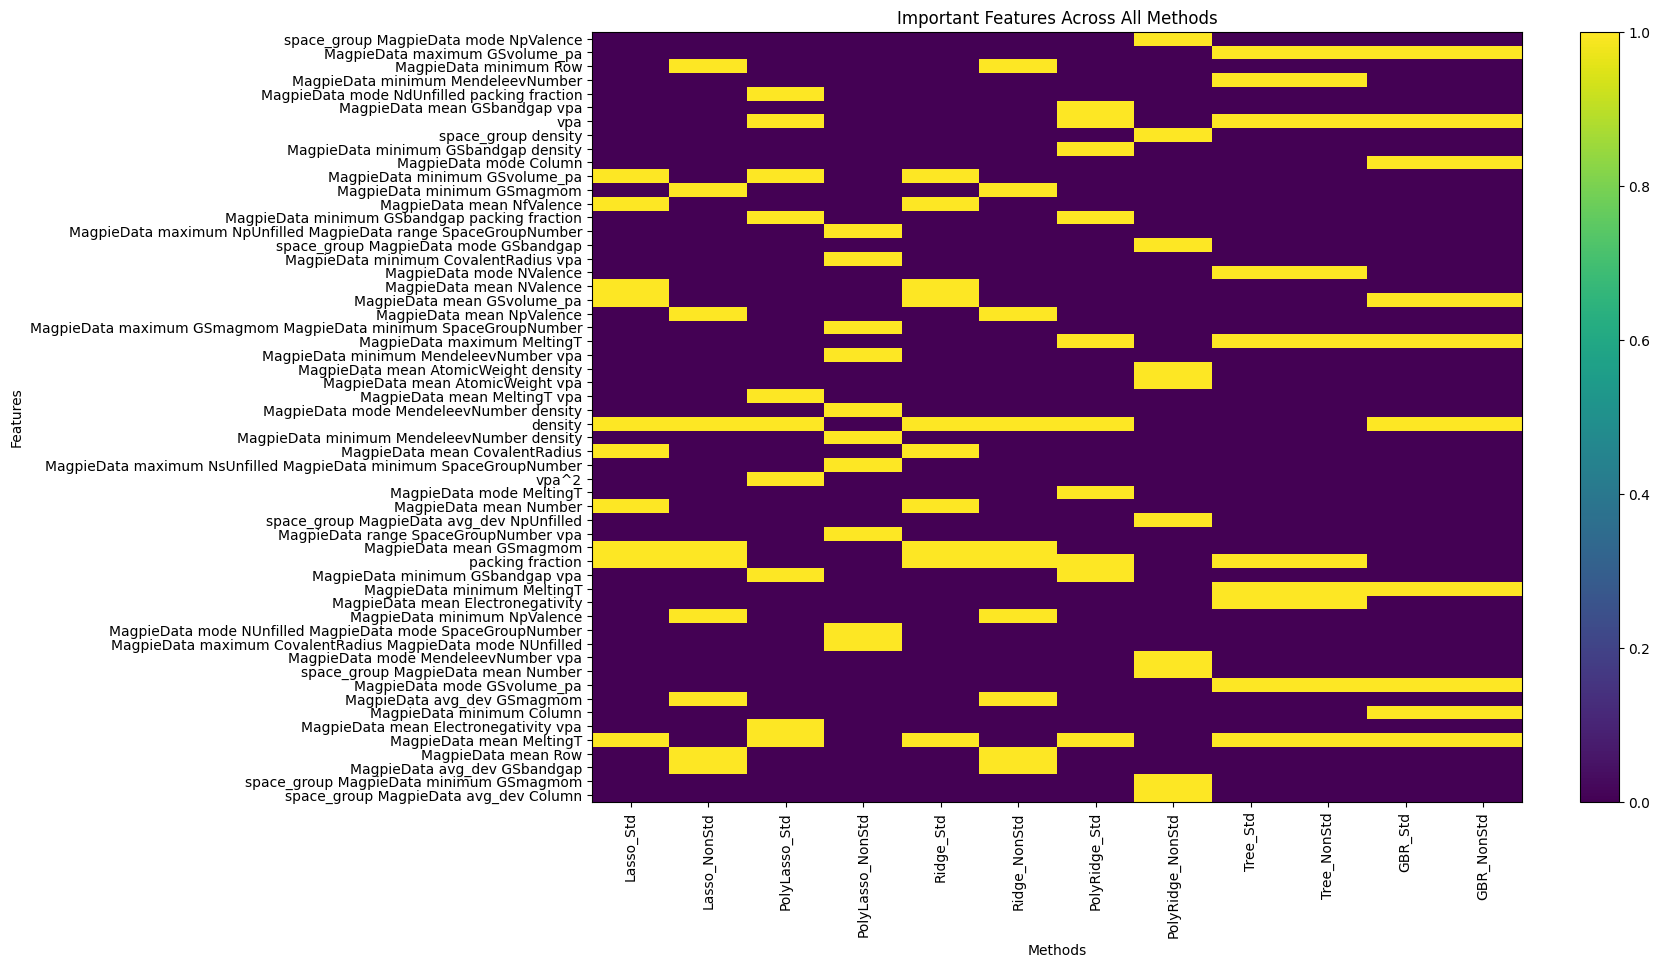

In [103]:
# Consolidate important features from all methods
All_Imp_features = {
    "Lasso_Std": Lasso_reg_Std[1],
    "Lasso_NonStd": Lasso_reg_NonStd[1],
    "PolyLasso_Std": Lasso_Reg_Poly_Std[1],
    "PolyLasso_NonStd": Lasso_Reg_Poly_NonStd[1],
    "Ridge_Std": Ridge_reg_Std[1],
    "Ridge_NonStd": Ridge_reg_NonStd[1],
    "PolyRidge_Std": Ridge_Reg_Poly_Std[1],
    "PolyRidge_NonStd": Ridge_Reg_Poly_NonStd[1],
    "Tree_Std": Decision_tree_Reg_Std[1],
    "Tree_NonStd": Decision_tree_Reg_NonStd[1],
    "GBR_Std": Decision_tree_Reg_gradBoost_Std[1],
    "GBR_NonStd": Decision_tree_Reg_gradBoost_NonStd[1]
}

# Create a DataFrame to track feature importance across methods
features_set = set()
for features in All_Imp_features.values():
    features_set.update(features)

features_list = list(features_set)
importance_df = pd.DataFrame(0, index=features_list, columns= All_Imp_features.keys())

for method, features in All_Imp_features.items():
    for feature in features:
        importance_df.loc[feature, method] = 1

# Plot the heatmap
plt.figure(figsize=(15, 10))
plt.title("Important Features Across All Methods")
plt.imshow(importance_df, cmap='viridis', aspect='auto')
plt.colorbar()
plt.xticks(ticks=np.arange(len(importance_df.columns)), labels=importance_df.columns, rotation=90)
plt.yticks(ticks=np.arange(len(importance_df.index)), labels=importance_df.index)
plt.xlabel("Methods")
plt.ylabel("Features")
plt.show()